In [1]:
from time import time
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('data/stocks.csv')

In [ ]:
df

,date,close,high,low,open,volume,ticker,dollar_vol,dollar_vol_1m,dollar_vol_rank,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-07-06,74.610542,75.101963,74.298526,74.797750,3852500,MCD,2.874371e+08,4.491610e+09,1.0,...,False,False,False,False,True,False,False,False,False,False
1,2015-07-07,75.413963,75.491966,74.290708,74.828936,4794400,MCD,3.615647e+08,4.547745e+09,1.0,...,False,False,False,False,True,False,False,False,False,False
2,2015-07-08,74.758736,75.343763,74.610533,74.610533,4914300,MCD,3.673869e+08,4.578243e+09,1.0,...,False,False,False,False,True,False,False,False,False,False
3,2015-07-09,75.265770,75.874198,75.226772,75.382777,5482500,MCD,4.126446e+08,4.675900e+09,1.0,...,False,False,False,False,True,False,False,False,False,False
4,2015-07-10,76.170616,76.272019,75.624587,75.858600,5179200,MCD,3.945029e+08,4.783547e+09,1.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118445,2024-11-22,308.343842,310.005331,306.334095,306.403747,5919200,V,1.825149e+09,1.299349e+09,28.0,...,False,False,False,False,False,False,False,False,True,False
118446,2024-11-25,311.597198,312.064809,308.284117,310.273946,14189300,V,4.421346e+09,1.370338e+09,27.0,...,False,False,False,False,False,False,False,False,True,False
118447,2024-11-26,310.234192,312.900555,309.955617,312.602093,7071500,V,2.193821e+09,1.410883e+09,25.0,...,False,False,False,False,False,False,False,False,True,False
118448,2024-11-27,313.099518,314.761008,307.915993,309.189482,5204300,V,1.629464e+09,1.435795e+09,25.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'ticker',
       'dollar_vol', 'dollar_vol_1m', 'dollar_vol_rank', 'rsi', 'bb_high',
       'bb_low', 'atr', 'macd', 'return_1d', 'return_5d', 'return_10d',
       'return_21d', 'return_42d', 'return_63d', 'lag_return_1d',
       'lag_return_5d', 'lag_return_10d', 'lag_return_21d', 'target_1d',
       'target_5d', 'target_10d', 'target_21d', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [ ]:
columns_to_drop = [c for c in df.columns if 'lag' in c] + ['open', 'close', 'high', 'low', 'dollar_vol', 'dollar_vol_rank', 'volume'] + [c for c in df.columns if 'year' in c] + [c for c in df.columns if 'month' in c]
print(f"Columns to drop: {columns_to_drop}")
print(f"Available columns: {list(df.columns)}")

# Only drop columns that actually exist
existing_lag_columns = [c for c in columns_to_drop if c in df.columns]
if existing_lag_columns:
    df = df.drop(existing_lag_columns, axis=1)
    print(f"Dropped {len(existing_lag_columns)} columns")
else:
    print("No lag columns found to drop")

Columns to drop: ['lag_return_1d', 'lag_return_5d', 'lag_return_10d', 'lag_return_21d', 'open', 'close', 'high', 'low', 'dollar_vol', 'dollar_vol_rank', 'volume', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
Available columns: ['date', 'close', 'high', 'low', 'open', 'volume', 'ticker', 'dollar_vol', 'dollar_vol_1m', 'dollar_vol_rank', 'rsi', 'bb_high', 'bb_low', 'atr', 'macd', 'return_1d', 'return_5d', 'return_10d', 'return_21d', 'return_42d', 'return_63d', 'lag_return_1d', 'lag_return_5d', 'lag_return_10d', 'lag_return_21d', 'target_1d', 'target_5d', 'target_10d', 'target_21d', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 

In [ ]:
df.columns

Index(['date', 'ticker', 'dollar_vol_1m', 'rsi', 'bb_high', 'bb_low', 'atr',
       'macd', 'return_1d', 'return_5d', 'return_10d', 'return_21d',
       'return_42d', 'return_63d', 'target_1d', 'target_5d', 'target_10d',
       'target_21d'],
      dtype='object')

In [ ]:
df.set_index(['ticker', 'date'], inplace=True)

Now we have to split our data into train and test sets.

### Split

In [ ]:
dates_available = df.index.get_level_values('date').unique()
dates_available

Index(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       ...
       '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21',
       '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29'],
      dtype='object', name='date', length=2369)

In [ ]:
split_index_id = int(np.floor(len(dates_available) * 0.8))
split_index_id

1895

In [ ]:
split_date = dates_available[split_index_id]
split_date

'2023-01-12'

In [ ]:
train_df = df[df.index.get_level_values('date') < split_date]
test_df = df[df.index.get_level_values('date') >= split_date]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(94750, 16)
(23700, 16)


### Create model data

In [ ]:
y_train = train_df.filter(like='target')
y_test = test_df.filter(like='target')
X_train = train_df.drop(y_train.columns, axis=1)
X_test = test_df.drop(y_test.columns, axis=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94750, 12)
(23700, 12)
(94750, 4)
(23700, 4)


In [ ]:
dates_df = X_train.reset_index()[['date']]
dates_df

,date
0,2015-07-06
1,2015-07-07
2,2015-07-08
3,2015-07-09
4,2015-07-10
...,...
94745,2023-01-05
94746,2023-01-06
94747,2023-01-09
94748,2023-01-10


### Cross-validation

In [ ]:
class CV:
    """Generate tuples of train-idx, test_idx pairs"""
    def __init__(self,
            n_splits=3,
            train_period_length=63,  
            test_period_length=10,   
            lookahead=None):
        self.n_splits = n_splits
        self.train_length = train_period_length  
        self.test_length = test_period_length    
        self.lookahead = lookahead
        
    def split(self, X, y=None):

        unique_dates = X.index.get_level_values('date').unique()
        dates_df = X.reset_index()[['date']]
        
        days = sorted(unique_dates, reverse=True)

        split_idx = []
        for i in range(self.n_splits):
            test_end_idx = i * self.test_length
            test_start_idx = test_end_idx + self.test_length
            train_end_idx = test_start_idx + self.lookahead - 1
            train_start_idx = train_end_idx + self.train_length + self.lookahead - 1  
            split_idx.append([train_start_idx, train_end_idx,
                              test_start_idx, test_end_idx])
                             
        for train_start, train_end, test_start, test_end in split_idx:
            if train_start >= len(days) or test_end < 0:
                continue
                
            train_idx = dates_df[(dates_df.date > days[train_start])
                                & (dates_df.date <= days[train_end])].index
            test_idx = dates_df[(dates_df.date > days[test_start])
                               & (dates_df.date <= days[test_end])].index
            
            if len(train_idx) > 0 and len(test_idx) > 0:  
                yield train_idx, test_idx

In [ ]:
train_period_length = 63
test_period_length = 10
n_splits = int(len(X_train.index.get_level_values('date').unique()) / test_period_length) 
lookahead = 1

cv = CV(n_splits=n_splits,
        train_period_length=train_period_length,  
        test_period_length=test_period_length,    
        lookahead=lookahead)

In [ ]:
i = 0
for train_idx, test_idx in cv.split(X=X_train):
    train = X_train.iloc[train_idx]
    test = X_train.iloc[test_idx]
    
    # Get actual date values
    train_dates = train.reset_index()['date']
    test_dates = test.reset_index()['date']
    
    # Count stocks per period and show date ranges
    train_stock_count = len(train['ticker'].unique()) if 'ticker' in train.columns else len(train)
    test_stock_count = len(test['ticker'].unique()) if 'ticker' in test.columns else len(test)
    
    print(f"Split {i+1}: 63 {train_dates.min()} to {train_dates.max()}, "
          f"10 {test_dates.min()} to {test_dates.max()}")
    
    i += 1
    if i == 10:
        break

Split 1: 63 2022-09-28 to 2022-12-27, 10 2022-12-28 to 2023-01-11
Split 2: 63 2022-09-14 to 2022-12-12, 10 2022-12-13 to 2022-12-27
Split 3: 63 2022-08-30 to 2022-11-28, 10 2022-11-29 to 2022-12-12
Split 4: 63 2022-08-16 to 2022-11-11, 10 2022-11-14 to 2022-11-28
Split 5: 63 2022-08-02 to 2022-10-28, 10 2022-10-31 to 2022-11-11
Split 6: 63 2022-07-19 to 2022-10-14, 10 2022-10-17 to 2022-10-28
Split 7: 63 2022-07-05 to 2022-09-30, 10 2022-10-03 to 2022-10-14
Split 8: 63 2022-06-17 to 2022-09-16, 10 2022-09-19 to 2022-09-30
Split 9: 63 2022-06-03 to 2022-09-01, 10 2022-09-02 to 2022-09-16
Split 10: 63 2022-05-19 to 2022-08-18, 10 2022-08-19 to 2022-09-01


In [ ]:
target = f'target_{lookahead}d'
target

'target_1d'

In [ ]:
# Set portfolio parameters
N_LONG = 5
N_SHORT = 5

### OLS Regression

In [ ]:
# OLS (Linear Regression) Model
ols_model = LinearRegression()

In [ ]:
ols_model.fit(X_train, y_train[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_test_pred_ols = ols_model.predict(X_test)

In [ ]:
y_test_pred_ols.shape

(23700,)

In [ ]:
# Prepare test predictions (OLS)
test_predictions_ols = y_test[[target]].copy()
test_predictions_ols['predicted_ols'] = y_test_pred_ols
test_predictions_ols.columns = ['actuals_ols', 'predicted_ols']
test_predictions_ols

actuals_ols  predicted_ols
ticker date                                  
MCD    2023-01-12     0.008249       0.000855
       2023-01-13     0.019413       0.000773
       2023-01-17    -0.029440       0.000524
       2023-01-18    -0.009247       0.000688
       2023-01-19     0.018969       0.000789
...                        ...            ...
V      2024-11-22     0.010551      -0.001073
       2024-11-25    -0.004374      -0.001103
       2024-11-26     0.009236      -0.001000
       2024-11-27     0.001207      -0.001060
       2024-11-29     0.004983      -0.001033

[23700 rows x 2 columns]

In [ ]:
# Convert to unstacked format for easy ranking (OLS)
predictions_unstacked_ols = test_predictions_ols['predicted_ols'].unstack('ticker')
actuals_unstacked_ols = test_predictions_ols['actuals_ols'].unstack('ticker')

In [ ]:
# Generate trading signals (OLS)
long_signals_ols = ((predictions_unstacked_ols
                .where(predictions_unstacked_ols > 0)
                .rank(axis=1, ascending=False) <= N_LONG)
                .astype(int))

short_signals_ols = ((predictions_unstacked_ols
                  .where(predictions_unstacked_ols < 0)
                  .rank(axis=1, ascending=True) <= N_SHORT)
                  .astype(int))

In [ ]:
# Calculate strategy returns (OLS)
long_returns_ols = (long_signals_ols * actuals_unstacked_ols).sum(axis=1) / long_signals_ols.sum(axis=1)
short_returns_ols = (short_signals_ols * (-actuals_unstacked_ols)).sum(axis=1) / short_signals_ols.sum(axis=1)
strategy_returns_ols = long_returns_ols.fillna(0) + short_returns_ols.fillna(0)

In [ ]:
print(f"OLS Strategy Sharpe Ratio: {strategy_returns_ols.mean() / strategy_returns_ols.std() * np.sqrt(252):.2f}")

OLS Strategy Sharpe Ratio: 0.59


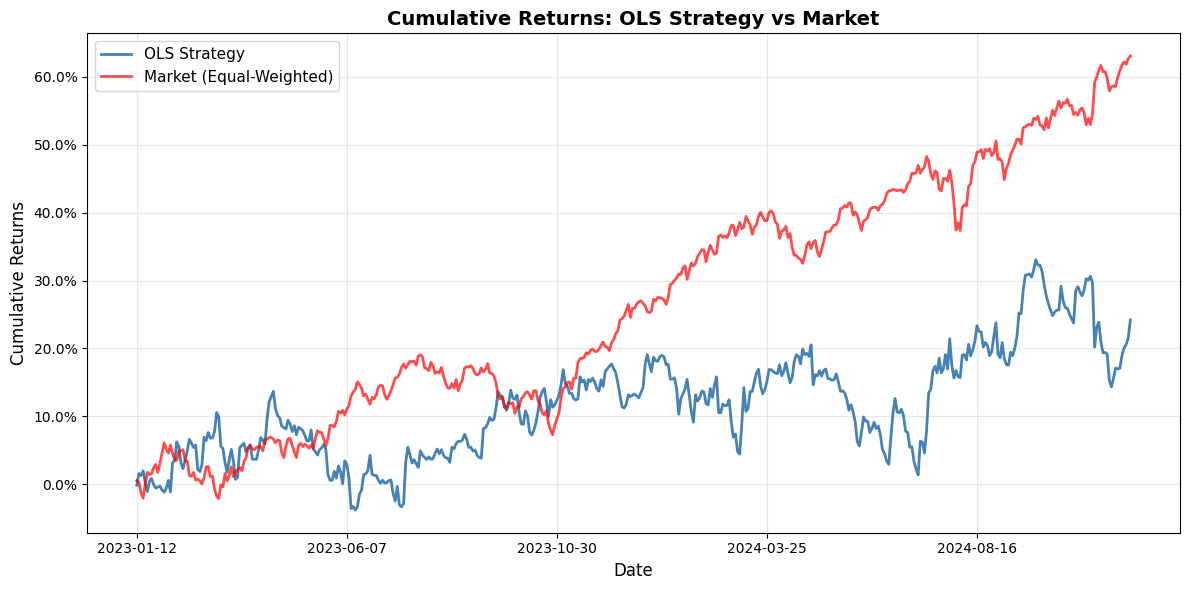

OLS Strategy Total Return: 24.19%
Market Total Return: 63.07%
OLS Strategy Sharpe Ratio: 0.59
Market Sharpe Ratio: 2.11


In [ ]:
# Calculate cumulative returns for strategy (OLS)
cumulative_strategy_returns_ols = (1 + strategy_returns_ols).cumprod() - 1

# Calculate market benchmark (OLS)
market_returns_ols = actuals_unstacked_ols.mean(axis=1)
cumulative_market_returns_ols = (1 + market_returns_ols).cumprod() - 1

plt.figure(figsize=(12, 6))

cumulative_strategy_returns_ols.plot(label='OLS Strategy', color='steelblue', linewidth=2)
cumulative_market_returns_ols.plot(label='Market (Equal-Weighted)', color='red', alpha=0.7, linewidth=2)

plt.title('Cumulative Returns: OLS Strategy vs Market', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"OLS Strategy Total Return: {cumulative_strategy_returns_ols.iloc[-1]:.2%}")
print(f"Market Total Return: {cumulative_market_returns_ols.iloc[-1]:.2%}")
print(f"OLS Strategy Sharpe Ratio: {strategy_returns_ols.mean() / strategy_returns_ols.std() * np.sqrt(252):.2f}")
print(f"Market Sharpe Ratio: {market_returns_ols.mean() / market_returns_ols.std() * np.sqrt(252):.2f}")

### Ridge Regression

In [ ]:
ridge_alphas = np.logspace(-4, 4, 9)
ridge_alphas = sorted(list(ridge_alphas) + list(ridge_alphas * 5))

In [ ]:
ridge_alphas

[np.float64(0.0001),
 np.float64(0.0005),
 np.float64(0.001),
 np.float64(0.005),
 np.float64(0.01),
 np.float64(0.05),
 np.float64(0.1),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(5.0),
 np.float64(10.0),
 np.float64(50.0),
 np.float64(100.0),
 np.float64(500.0),
 np.float64(1000.0),
 np.float64(5000.0),
 np.float64(10000.0),
 np.float64(50000.0)]

In [ ]:
ridge_coeffs, ridge_scores, ridge_predictions = {}, [], []

for alpha in ridge_alphas:
    start = time()
    model = Ridge(alpha=alpha,
                  fit_intercept=False,
                  random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    coeffs = []
    for (train_idx, test_idx) in cv.split(X_train):
        X_curr_train, y_curr_train = X_train.iloc[train_idx], y_train[target].iloc[train_idx]
        X_curr_test, y_curr_test = X_train.iloc[test_idx], y_train[target].iloc[test_idx]

        pipe.fit(X=X_curr_train, y=y_curr_train)
        y_pred = pipe.predict(X_curr_test)

        preds = y_curr_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')], axis=1)

        ridge_scores.append(scores.assign(alpha=alpha))
        ridge_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)
    ridge_coeffs[alpha] = np.mean(coeffs, axis=0)

print('\n')


In [ ]:
ridge_scores = pd.concat(ridge_scores)
ridge_scores

,ic,rmse,alpha
date,,,
2022-12-28,33.723890,0.024540,0.0001
2022-12-29,-0.677071,0.005064,0.0001
2022-12-30,-20.019208,0.022551,0.0001
2023-01-03,-31.591837,0.023873,0.0001
2023-01-04,-29.085234,0.015728,0.0001
...,...,...,...
2015-10-13,-4.067227,0.019372,50000.0000
2015-10-14,41.416567,0.024423,50000.0000
2015-10-15,-12.268908,0.010756,50000.0000


In [ ]:
ridge_coeffs = pd.DataFrame(ridge_coeffs, index=X_train.columns).T
ridge_coeffs

,dollar_vol_1m,rsi,bb_high,bb_low,atr,macd,return_1d,return_5d,return_10d,return_21d,return_42d,return_63d
0.0001,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.0005,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.0010,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.0050,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.0100,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.0500,0.000094,0.000923,0.000715,-0.000243,-0.000302,-0.001228,-0.000949,-0.000374,-0.000124,0.000929,-0.000263,-0.000302
0.1000,0.000094,0.000923,0.000715,-0.000242,-0.000302,-0.001227,-0.000949,-0.000374,-0.000124,0.000928,-0.000263,-0.000302
0.5000,0.000094,0.000920,0.000713,-0.000241,-0.000301,-0.001226,-0.000949,-0.000374,-0.000125,0.000927,-0.000263,-0.000302
1.0000,0.000094,0.000918,0.000710,-0.000238,-0.000301,-0.001224,-0.000948,-0.000374,-0.000126,0.000925,-0.000263,-0.000302
5.0000,0.000094,0.000896,0.000690,-0.000221,-0.000300,-0.001208,-0.000945,-0.000373,-0.000135,0.000909,-0.000261,-0.000301


In [ ]:
ridge_predictions = pd.concat(ridge_predictions)
ridge_predictions

actuals  predicted       alpha
ticker date                                       
MCD    2022-12-28  0.003093   0.000039      0.0001
       2022-12-29 -0.009025   0.000535      0.0001
       2022-12-30  0.003036   0.000275      0.0001
       2023-01-03  0.000227  -0.000201      0.0001
       2023-01-04 -0.008434  -0.000510      0.0001
...                     ...        ...         ...
V      2015-10-13 -0.010666  -0.000526  50000.0000
       2015-10-14  0.015363  -0.000436  50000.0000
       2015-10-15  0.008761  -0.000334  50000.0000
       2015-10-16  0.013026  -0.000421  50000.0000
       2015-10-19 -0.009222  -0.000430  50000.0000

[1647000 rows x 3 columns]

In [ ]:
best_alpha = float(ridge_scores.groupby('alpha').ic.mean().idxmax())
best_alpha

100.0

In [ ]:
ridge_model = Ridge(alpha=best_alpha, fit_intercept=False, random_state=42)
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('model', ridge_model)])
ridge_pipe.fit(X=X_train, y=y_train[target])

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,100.0
,fit_intercept,False
,copy_X,True
,max_iter,None


In [ ]:
y_test_pred_ridge = ridge_pipe.predict(X_test)

In [ ]:
# Prepare test predictions (Ridge)
test_predictions_ridge = y_test[[target]].copy()
test_predictions_ridge['predicted_ridge'] = y_test_pred_ridge
test_predictions_ridge.columns = ['actuals_ridge', 'predicted_ridge']
test_predictions_ridge

actuals_ridge  predicted_ridge
ticker date                                      
MCD    2023-01-12       0.008249        -0.000283
       2023-01-13       0.019413        -0.001170
       2023-01-17      -0.029440        -0.002014
       2023-01-18      -0.009247         0.001270
       2023-01-19       0.018969        -0.000166
...                          ...              ...
V      2024-11-22       0.010551        -0.002151
       2024-11-25      -0.004374        -0.002642
       2024-11-26       0.009236        -0.001671
       2024-11-27       0.001207        -0.002647
       2024-11-29       0.004983        -0.002195

[23700 rows x 2 columns]

In [ ]:
# Convert to unstacked format for easy ranking (Ridge)
ridge_predictions_unstacked = test_predictions_ridge['predicted_ridge'].unstack('ticker')
ridge_actuals_unstacked = test_predictions_ridge['actuals_ridge'].unstack('ticker')

In [ ]:
# Generate trading signals (Ridge)
long_signals_ridge = ((ridge_predictions_unstacked
                .where(ridge_predictions_unstacked > 0)
                .rank(axis=1, ascending=False) <= N_LONG)
                .astype(int))

short_signals_ridge = ((ridge_predictions_unstacked
                  .where(ridge_predictions_unstacked < 0)
                  .rank(axis=1, ascending=True) <= N_SHORT)
                  .astype(int))

In [ ]:
# Calculate strategy returns (Ridge)
long_returns_ridge = (long_signals_ridge * ridge_actuals_unstacked).sum(axis=1) / long_signals_ridge.sum(axis=1)
short_returns_ridge = (short_signals_ridge * (-ridge_actuals_unstacked)).sum(axis=1) / short_signals_ridge.sum(axis=1)
strategy_returns_ridge = long_returns_ridge.fillna(0) + short_returns_ridge.fillna(0)

In [ ]:
print(f"Ridge Strategy Sharpe Ratio: {strategy_returns_ridge.mean() / strategy_returns_ridge.std() * np.sqrt(252):.2f}")

Ridge Strategy Sharpe Ratio: 1.25


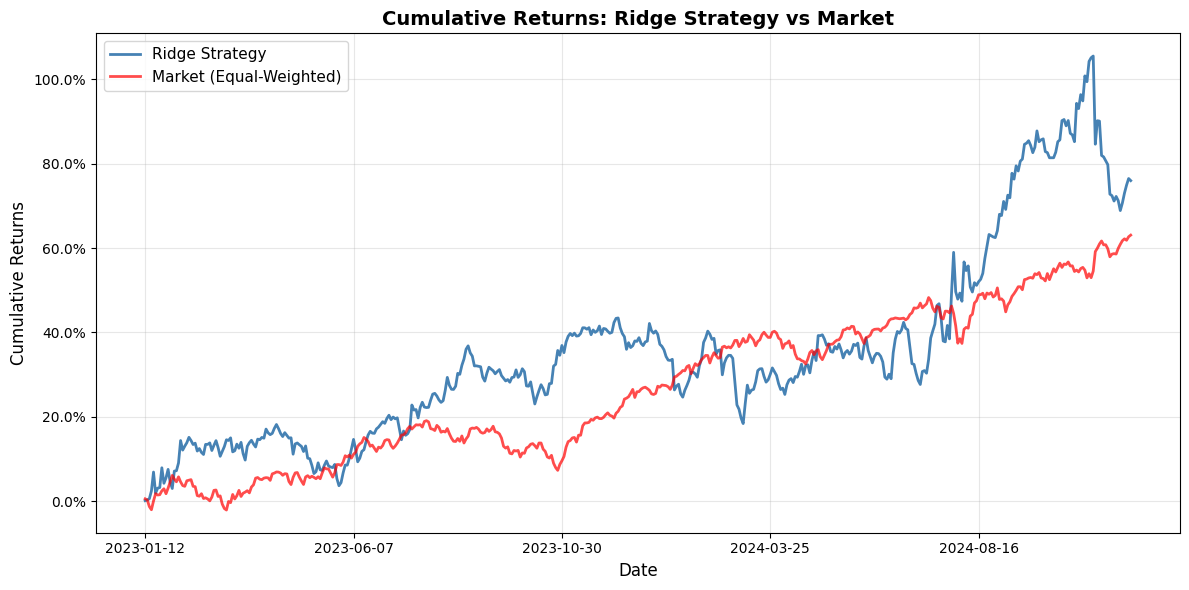

Ridge Strategy Total Return: 75.99%
Market Total Return: 63.07%
Ridge Strategy Sharpe Ratio: 1.25
Market Sharpe Ratio: 2.11


In [ ]:
# Calculate cumulative returns for strategy (Ridge)
cumulative_strategy_returns_ridge = (1 + strategy_returns_ridge).cumprod() - 1

# Calculate market benchmark (Ridge)
market_returns_ridge = ridge_actuals_unstacked.mean(axis=1)  
cumulative_market_returns_ridge = (1 + market_returns_ridge).cumprod() - 1

plt.figure(figsize=(12, 6))

cumulative_strategy_returns_ridge.plot(label='Ridge Strategy', color='steelblue', linewidth=2)
cumulative_market_returns_ridge.plot(label='Market (Equal-Weighted)', color='red', alpha=0.7, linewidth=2)

plt.title('Cumulative Returns: Ridge Strategy vs Market', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Ridge Strategy Total Return: {cumulative_strategy_returns_ridge.iloc[-1]:.2%}")
print(f"Market Total Return: {cumulative_market_returns_ridge.iloc[-1]:.2%}")
print(f"Ridge Strategy Sharpe Ratio: {strategy_returns_ridge.mean() / strategy_returns_ridge.std() * np.sqrt(252):.2f}")
print(f"Market Sharpe Ratio: {market_returns_ridge.mean() / market_returns_ridge.std() * np.sqrt(252):.2f}")

### Lasso Regression

In [ ]:
lasso_alphas_list = np.logspace(-7, -5, 5)
lasso_alphas_list = sorted(list(lasso_alphas_list) + list(lasso_alphas_list * 5))

In [ ]:
lasso_alphas_list

[np.float64(1e-07),
 np.float64(3.162277660168379e-07),
 np.float64(5e-07),
 np.float64(1e-06),
 np.float64(1.5811388300841896e-06),
 np.float64(3.162277660168379e-06),
 np.float64(4.9999999999999996e-06),
 np.float64(1e-05),
 np.float64(1.5811388300841894e-05),
 np.float64(5e-05)]

In [ ]:
lasso_coeffs, lasso_scores, lasso_predictions = {}, [], []
for l_alpha in lasso_alphas_list:
    l_model = Lasso(alpha=l_alpha, fit_intercept=False, random_state=42)
    l_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', l_model)
    ])
    l_coeffs = []
    for (train_idx, test_idx) in cv.split(X_train):
        X_curr_train, y_curr_train = X_train.iloc[train_idx], y_train[target].iloc[train_idx]
        X_curr_test, y_curr_test = X_train.iloc[test_idx], y_train[target].iloc[test_idx]

        l_pipe.fit(X=X_curr_train, y=y_curr_train)
        y_pred_lasso_cv = l_pipe.predict(X_curr_test)

        preds_lasso = y_curr_test.to_frame('actuals_lasso').assign(predicted_lasso=y_pred_lasso_cv)
        preds_by_day_lasso = preds_lasso.groupby(level='date')

        scores_lasso = pd.concat([
            preds_by_day_lasso.apply(lambda x: spearmanr(x.predicted_lasso,
                                                                   x.actuals_lasso)[0] * 100).to_frame('ic_lasso'),
            preds_by_day_lasso.apply(lambda df_: np.sqrt(mean_squared_error(
                y_pred=df_.predicted_lasso, y_true=df_.actuals_lasso))).to_frame('rmse_lasso')
        ], axis=1)

        lasso_scores.append(scores_lasso.assign(alpha_lasso=l_alpha))
        lasso_predictions.append(preds_lasso.assign(alpha_lasso=l_alpha))
        l_coeffs.append(l_pipe.named_steps['model'].coef_)
    lasso_coeffs[l_alpha] = np.mean(l_coeffs, axis=0)
print('\n')

In [ ]:
lasso_scores = pd.concat(lasso_scores)
lasso_scores

,ic_lasso,rmse_lasso,alpha_lasso
date,,,
2022-12-28,33.723890,0.024540,1.000000e-07
2022-12-29,-0.677071,0.005064,1.000000e-07
2022-12-30,-20.019208,0.022551,1.000000e-07
2023-01-03,-31.591837,0.023873,1.000000e-07
2023-01-04,-29.085234,0.015729,1.000000e-07
...,...,...,...
2015-10-13,-7.332533,0.019348,5.000000e-05
2015-10-14,-3.846339,0.025324,5.000000e-05
2015-10-15,27.625450,0.009597,5.000000e-05


In [ ]:
lasso_coeffs = pd.DataFrame(lasso_coeffs, index=X_train.columns).T
lasso_coeffs

,dollar_vol_1m,rsi,bb_high,bb_low,atr,macd,return_1d,return_5d,return_10d,return_21d,return_42d,return_63d
1.000000e-07,0.000094,0.000923,0.000715,-0.000242,-0.000302,-0.001227,-0.000949,-0.000374,-0.000124,0.000928,-0.000263,-0.000302
3.162278e-07,0.000093,0.000922,0.000714,-0.000242,-0.000301,-0.001226,-0.000949,-0.000373,-0.000124,0.000928,-0.000263,-0.000302
5.000000e-07,0.000093,0.000921,0.000713,-0.000241,-0.000301,-0.001225,-0.000949,-0.000373,-0.000125,0.000927,-0.000263,-0.000302
1.000000e-06,0.000093,0.000918,0.000711,-0.000240,-0.000301,-0.001223,-0.000948,-0.000373,-0.000126,0.000925,-0.000263,-0.000302
1.581139e-06,0.000093,0.000915,0.000709,-0.000238,-0.000300,-0.001221,-0.000948,-0.000372,-0.000127,0.000923,-0.000263,-0.000302
3.162278e-06,0.000092,0.000907,0.000703,-0.000233,-0.000299,-0.001213,-0.000947,-0.000371,-0.000131,0.000918,-0.000263,-0.000302
5.000000e-06,0.000092,0.000898,0.000696,-0.000228,-0.000298,-0.001205,-0.000945,-0.000369,-0.000134,0.000911,-0.000263,-0.000302
1.000000e-05,0.000090,0.000874,0.000678,-0.000215,-0.000294,-0.001182,-0.000941,-0.000363,-0.000143,0.000894,-0.000263,-0.000302
1.581139e-05,0.000088,0.000847,0.000661,-0.000204,-0.000290,-0.001155,-0.000936,-0.000356,-0.000149,0.000875,-0.000263,-0.000301
5.000000e-05,0.000077,0.000703,0.000562,-0.000134,-0.000263,-0.001008,-0.000908,-0.000327,-0.000181,0.000765,-0.000264,-0.000298


In [ ]:
lasso_predictions = pd.concat(lasso_predictions)
lasso_predictions

actuals_lasso  predicted_lasso   alpha_lasso
ticker date                                                    
MCD    2022-12-28       0.003093         0.000038  1.000000e-07
       2022-12-29      -0.009025         0.000534  1.000000e-07
       2022-12-30       0.003036         0.000274  1.000000e-07
       2023-01-03       0.000227        -0.000202  1.000000e-07
       2023-01-04      -0.008434        -0.000510  1.000000e-07
...                          ...              ...           ...
V      2015-10-13      -0.010666        -0.002065  5.000000e-05
       2015-10-14       0.015363        -0.002419  5.000000e-05
       2015-10-15       0.008761         0.001426  5.000000e-05
       2015-10-16       0.013026        -0.000269  5.000000e-05
       2015-10-19      -0.009222         0.000875  5.000000e-05

[915000 rows x 3 columns]

In [ ]:
best_alpha_lasso = float(lasso_scores.groupby('alpha_lasso').ic_lasso.mean().idxmax())
best_alpha_lasso

1.5811388300841894e-05

In [ ]:
lasso_model = Lasso(alpha=best_alpha_lasso, fit_intercept=True, random_state=42)
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('model', lasso_model)])
lasso_pipe.fit(X=X_train, y=y_train[target])

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.5811388300841894e-05
,fit_intercept,True
,precompute,False
,copy_X,True


In [ ]:
# ...existing code...
print("X_train shape:", X_train.shape)
if X_train.shape[1] == 0:
    raise ValueError("No features in X_train. Check dropped columns logic.")

print("Best alpha (lasso):", best_alpha_lasso)
print("Non-zero coeff count:", np.count_nonzero(lasso_model.coef_))
print("All coeff zero?", np.all(lasso_model.coef_ == 0))
# Distribution of y
print("y_train target std:", y_train[target].std())
# ...existing code...

X_train shape: (94750, 12)
Best alpha (lasso): 1.5811388300841894e-05
Non-zero coeff count: 11
All coeff zero? False
y_train target std: 0.019600662823998832


In [ ]:
y_test_pred_lasso = lasso_pipe.predict(X_test)

In [ ]:
# Prepare test predictions (Lasso)
test_predictions_lasso = y_test[[target]].copy()
test_predictions_lasso['predicted_lasso'] = y_test_pred_lasso
test_predictions_lasso.columns = ['actuals_lasso', 'predicted_lasso']
test_predictions_lasso

actuals_lasso  predicted_lasso
ticker date                                      
MCD    2023-01-12       0.008249         0.000606
       2023-01-13       0.019413        -0.000315
       2023-01-17      -0.029440        -0.001153
       2023-01-18      -0.009247         0.002137
       2023-01-19       0.018969         0.000701
...                          ...              ...
V      2024-11-22       0.010551        -0.001281
       2024-11-25      -0.004374        -0.001798
       2024-11-26       0.009236        -0.000817
       2024-11-27       0.001207        -0.001780
       2024-11-29       0.004983        -0.001315

[23700 rows x 2 columns]

In [ ]:
# Convert to unstacked format for easy ranking (Lasso)
predictions_unstacked_lasso = test_predictions_lasso['predicted_lasso'].unstack('ticker')
actuals_unstacked_lasso = test_predictions_lasso['actuals_lasso'].unstack('ticker')

In [ ]:
# Generate trading signals (Lasso)
long_signals_lasso = ((predictions_unstacked_lasso
                .where(predictions_unstacked_lasso > 0)
                .rank(axis=1, ascending=False) <= N_LONG)
                .astype(int))

short_signals_lasso = ((predictions_unstacked_lasso
                  .where(predictions_unstacked_lasso < 0)
                  .rank(axis=1, ascending=True) <= N_SHORT)
                  .astype(int))

In [ ]:
# Calculate strategy returns (Lasso)
long_returns_lasso = (long_signals_lasso * actuals_unstacked_lasso).sum(axis=1) / long_signals_lasso.sum(axis=1)
short_returns_lasso = (short_signals_lasso * (-actuals_unstacked_lasso)).sum(axis=1) / short_signals_lasso.sum(axis=1)
strategy_returns_lasso = long_returns_lasso.fillna(0) + short_returns_lasso.fillna(0)

In [ ]:
print(f"Lasso Strategy Sharpe Ratio: {strategy_returns_lasso.mean() / strategy_returns_lasso.std() * np.sqrt(252):.2f}")

Lasso Strategy Sharpe Ratio: 0.91


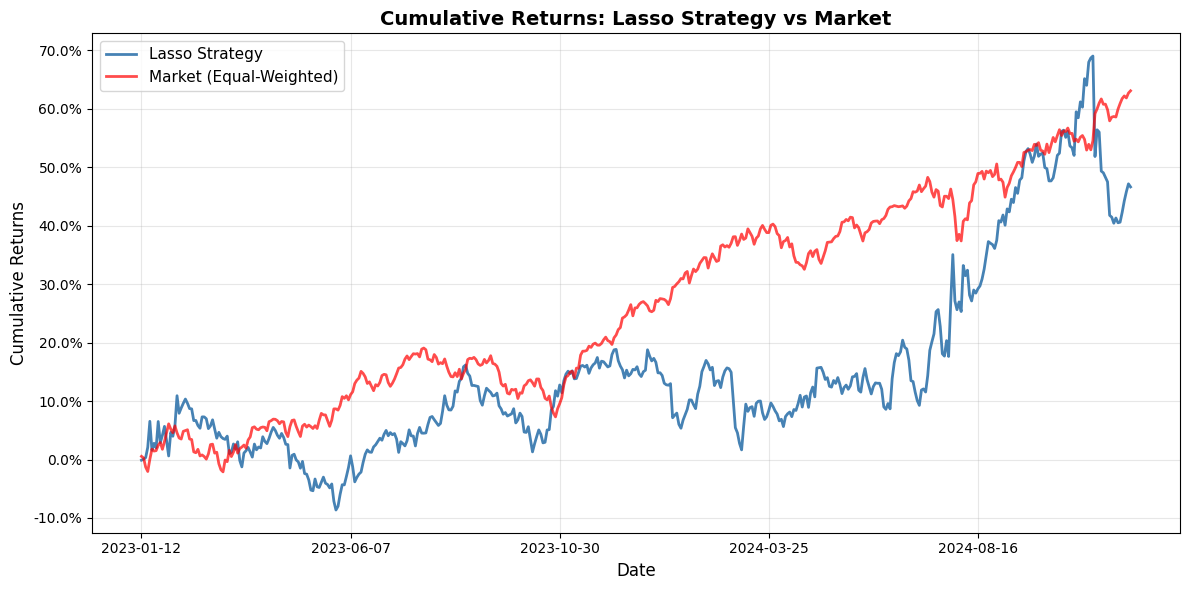

Lasso Strategy Total Return: 46.63%
Market Total Return: 63.07%
Lasso Strategy Sharpe Ratio: 0.91
Market Sharpe Ratio: 2.11


In [ ]:
# Calculate cumulative returns for strategy (Lasso)
cumulative_strategy_returns_lasso = (1 + strategy_returns_lasso).cumprod() - 1

# Calculate market benchmark (Lasso)
market_returns_lasso = actuals_unstacked_lasso.mean(axis=1)  
cumulative_market_returns_lasso = (1 + market_returns_lasso).cumprod() - 1

plt.figure(figsize=(12, 6))

cumulative_strategy_returns_lasso.plot(label='Lasso Strategy', color='steelblue', linewidth=2)
cumulative_market_returns_lasso.plot(label='Market (Equal-Weighted)', color='red', alpha=0.7, linewidth=2)

plt.title('Cumulative Returns: Lasso Strategy vs Market', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Lasso Strategy Total Return: {cumulative_strategy_returns_lasso.iloc[-1]:.2%}")
print(f"Market Total Return: {cumulative_market_returns_lasso.iloc[-1]:.2%}")
print(f"Lasso Strategy Sharpe Ratio: {strategy_returns_lasso.mean() / strategy_returns_lasso.std() * np.sqrt(252):.2f}")
print(f"Market Sharpe Ratio: {market_returns_lasso.mean() / market_returns_lasso.std() * np.sqrt(252):.2f}")